In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
play = pd.read_csv("playstore-analysis (2) (1).csv")
play.sample(10)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
2086,Sago Mini Big City,FAMILY,4.2,8,44000.000000,"1,000+",Paid,$3.99,Everyone,Education;Pretend Play,"July 9, 2018",1.1,4.4 and up
9069,Dy So Exam,FAMILY,3.0,6,3200.000000,"1,000+",Free,0,Everyone,Education,"July 3, 2017",1.0,2.3 and up
10071,How To Get Your Ex Back Fast,LIFESTYLE,4.0,22,19000.000000,"5,000+",Free,0,Everyone,Lifestyle,"February 7, 2018",15.0,4.0.3 and up
7672,Cestovné poriadky CP,MAPS_AND_NAVIGATION,4.6,2681,6300.000000,"100,000+",Free,0,Everyone,Maps & Navigation,"September 25, 2017",1.2.0,4.0.3 and up
5128,Fertilizer Removal By Crop,BOOKS_AND_REFERENCE,4.1,295,6900.000000,"50,000+",Free,0,Everyone,Books & Reference,"June 20, 2017",2.0.3,4.0.3 and up
7246,Themes DAF CF 85 Trucks,PERSONALIZATION,NaN,2,17000.000000,100+,Free,0,Teen,Personalization,"June 9, 2016",1.0,2.3.3 and up
3835,"Mappy - Plan, route comparison, GPS",MAPS_AND_NAVIGATION,4.1,15922,21516.529524,"1,000,000+",Free,0,Everyone,Maps & Navigation,"July 26, 2018",Varies with device,Varies with device
3080,"Bleacher Report: sports news, scores, & highli...",SPORTS,4.4,122283,21516.529524,"5,000,000+",Free,0,Everyone 10+,Sports,"July 20, 2018",Varies with device,Varies with device
9661,EO Bijbel Open,LIFESTYLE,4.3,102,41000.000000,"10,000+",Free,0,Everyone,Lifestyle,"November 24, 2016",2.0.0,4.0.3 and up
3802,"Fox News – Breaking News, Live Video & News Al...",NEWS_AND_MAGAZINES,4.5,249919,21516.529524,"10,000,000+",Free,0,Everyone 10+,News & Magazines,"July 30, 2018",Varies with device,Varies with device


In [3]:
play.shape

(10841, 13)

In [4]:
play_copy = play.copy()

In [5]:
play_copy.dtypes

App                object
Category           object
Rating            float64
Reviews            object
Size              float64
Installs           object
Type               object
Price              object
Content Rating     object
Genres             object
Last Updated       object
Current Ver        object
Android Ver        object
dtype: object

In [6]:
play.isnull().sum()

App                  0
Category             0
Rating            1474
Reviews              0
Size                 0
Installs             0
Type                 1
Price                0
Content Rating       1
Genres               0
Last Updated         0
Current Ver          8
Android Ver          3
dtype: int64

In [7]:
play_copy.describe()
#this means we only have 2 numeric column

,Rating,Size
count,9367.000000,10841.000000
mean,4.193338,21516.529524
std,0.537431,20746.537567
min,1.000000,8.500000
25%,4.000000,5900.000000
50%,4.300000,18000.000000
75%,4.500000,26000.000000
max,19.000000,100000.000000


### 1 data clean up - missing value treatment 
### a. Drop records where rating is missing since rating is our target/study variable 
### b. Check the null values for the Android Ver column.
### i. Are all 3 records having the same problem? 
### ii. Drop the 3rd record i.e. record for “Life Made WIFI …” 
### iii. Replace remaining missing values with the mode 
### c. Current ver – replace with most common value 

In [8]:
# Drop records where rating is missing since rating is our target/study variable 
play_copy.dropna(subset = ['Rating'],how = 'any', inplace = True,axis = 0)

In [9]:
play_copy['Android Ver'].isnull().sum()

3

In [10]:
print(play_copy[play_copy["Android Ver"].isnull()].head())

                                           App         Category  Rating  \
4453                    [substratum] Vacuum: P  PERSONALIZATION     4.4   
4490                      Pi Dark [substratum]  PERSONALIZATION     4.5   
10472  Life Made WI-Fi Touchscreen Photo Frame              1.9    19.0   

      Reviews          Size Installs  Type     Price Content Rating  \
4453      230  11000.000000   1,000+  Paid     $1.49       Everyone   
4490      189   2100.000000  10,000+  Free         0       Everyone   
10472    3.0M  21516.529524     Free     0  Everyone            NaN   

                  Genres    Last Updated Current Ver Android Ver  
4453     Personalization   July 20, 2018         4.4         NaN  
4490     Personalization  March 27, 2018         1.1         NaN  
10472  February 11, 2018          1.0.19  4.0 and up         NaN  


In [11]:
# droping the 3rd record i.e. record for “Life Made WIFI …” 
play_copy.drop([10472], axis=0,inplace =True)

In [12]:
play_copy.loc[play_copy['Android Ver'].isnull()]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
4453,[substratum] Vacuum: P,PERSONALIZATION,4.4,230,11000.0,"1,000+",Paid,$1.49,Everyone,Personalization,"July 20, 2018",4.4,NaN
4490,Pi Dark [substratum],PERSONALIZATION,4.5,189,2100.0,"10,000+",Free,0,Everyone,Personalization,"March 27, 2018",1.1,NaN


In [13]:
#android ver column is of object type so we cannot fill missing values with mode
play_copy['Android Ver'].fillna(play_copy['Android Ver'].mode()[0], inplace=True)

In [14]:
play_copy['Android Ver'].isnull().sum()

0

In [15]:
#  c Current ver – replace with most common value 
play_copy['Current Ver'].fillna(play_copy['Current Ver'].mode()[0], inplace=True)

In [16]:
play_copy['Current Ver'].isnull().sum()

0

## 2. Data clean up – correcting the data types
### a. Which all variables need to be brought to numeric types? 
### b. Price variable – remove dollar sign and convert to ﬂoat
### c. Installs – remove ‘,’ and ‘+’ sign, convert to integer d. Convert all other identiﬁed columns to numeric 

In [17]:
play_copy.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19000.0,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14000.0,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8700.0,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25000.0,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2800.0,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [18]:
# (A) converting reviews , installs , price and current ver columns to numeric data types 
play_copy['Reviews'] = pd.to_numeric(play_copy['Reviews'], errors='coerce')
play_copy['Current Ver'] = pd.to_numeric(play_copy['Current Ver'], errors='coerce')
play_copy.dtypes

App                object
Category           object
Rating            float64
Reviews             int64
Size              float64
Installs           object
Type               object
Price              object
Content Rating     object
Genres             object
Last Updated       object
Current Ver       float64
Android Ver        object
dtype: object

In [19]:
play_copy['Price'].unique()

array(['0', '$4.99', '$3.99', '$6.99', '$7.99', '$5.99', '$2.99', '$3.49',
       '$1.99', '$9.99', '$7.49', '$0.99', '$9.00', '$5.49', '$10.00',
       '$24.99', '$11.99', '$79.99', '$16.99', '$14.99', '$29.99',
       '$12.99', '$2.49', '$10.99', '$1.50', '$19.99', '$15.99', '$33.99',
       '$39.99', '$3.95', '$4.49', '$1.70', '$8.99', '$1.49', '$3.88',
       '$399.99', '$17.99', '$400.00', '$3.02', '$1.76', '$4.84', '$4.77',
       '$1.61', '$2.50', '$1.59', '$6.49', '$1.29', '$299.99', '$379.99',
       '$37.99', '$18.99', '$389.99', '$8.49', '$1.75', '$14.00', '$2.00',
       '$3.08', '$2.59', '$19.40', '$3.90', '$4.59', '$15.46', '$3.04',
       '$13.99', '$4.29', '$3.28', '$4.60', '$1.00', '$2.95', '$2.90',
       '$1.97', '$2.56', '$1.20'], dtype=object)

In [20]:
#removing '$' sign from price column and converting the column to numeric type
play_copy['Price'] = play_copy['Price'].str.replace('$', '').astype(object)
play_copy['Price'] = pd.to_numeric(play_copy['Price'], errors='coerce')


In [21]:
play_copy['Installs'].unique()


array(['10,000+', '500,000+', '5,000,000+', '50,000,000+', '100,000+',
       '50,000+', '1,000,000+', '10,000,000+', '5,000+', '100,000,000+',
       '1,000,000,000+', '1,000+', '500,000,000+', '100+', '500+', '10+',
       '5+', '50+', '1+'], dtype=object)

In [22]:
#removing ',' and '+' signs from installs column
play_copy['Installs'] = play_copy['Installs'].str.replace(',', '').str.replace('+', '').astype(object)
play_copy['Installs'] = pd.to_numeric(play_copy['Installs'], errors='coerce')

In [23]:
play_copy['Installs'].dtypes

dtype('int64')

# 3. Sanity checks – check for the following and handle accordingly 
### a. Avg. rating should be between 1 and 5, as only these values are allowed on the play store. i. Are there any such records? Drop if so. 
### b. Reviews should not be more than installs as only those who installed can review the app. i. Are there any such records? Drop if so. 

In [24]:
play_copy['Rating'].unique()

array([4.1, 3.9, 4.7, 4.5, 4.3, 4.4, 3.8, 4.2, 4.6, 3.2, 4. , 4.8, 4.9,
       3.6, 3.7, 3.3, 3.4, 3.5, 3.1, 5. , 2.6, 3. , 1.9, 2.5, 2.8, 2.7,
       1. , 2.9, 2.3, 2.2, 1.7, 2. , 1.8, 2.4, 1.6, 2.1, 1.4, 1.5, 1.2])

In [25]:
play_copy.loc[play_copy['Rating'] > 5]
# As we do not have any such record where rating is more than 5  

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver


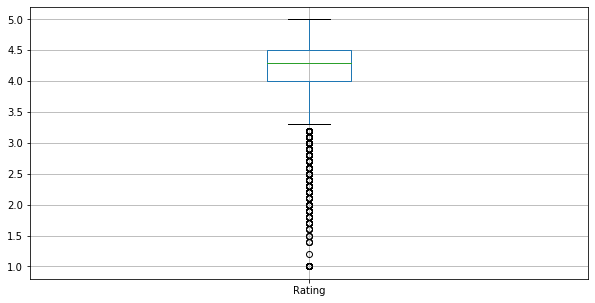

In [26]:
#checking for outliers for safe check 
play_copy.boxplot(column= 'Rating', figsize=(10,5))

In [27]:
#Reviews should not be more than installs as only those who installed can review the app. 
#i. Are there any such records? Drop if so. 


In [28]:
play_copy.loc[play_copy['Reviews'] > play_copy['Installs']]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
2454,KBA-EZ Health Guide,MEDICAL,5.0,4,25000.000000,1,Free,0.00,Everyone,Medical,"August 2, 2018",NaN,4.0.3 and up
4663,Alarmy (Sleep If U Can) - Pro,LIFESTYLE,4.8,10249,21516.529524,10000,Paid,2.49,Everyone,Lifestyle,"July 30, 2018",NaN,Varies with device
5917,Ra Ga Ba,GAME,5.0,2,20000.000000,1,Paid,1.49,Everyone,Arcade,"February 8, 2017",NaN,2.3 and up
6700,Brick Breaker BR,GAME,5.0,7,19000.000000,5,Free,0.00,Everyone,Arcade,"July 23, 2018",1.0,4.1 and up
7402,Trovami se ci riesci,GAME,5.0,11,6100.000000,10,Free,0.00,Everyone,Arcade,"March 11, 2017",0.1,2.3 and up
8591,DN Blog,SOCIAL,5.0,20,4200.000000,10,Free,0.00,Teen,Social,"July 23, 2018",1.0,4.0 and up
10697,Mu.F.O.,GAME,5.0,2,16000.000000,1,Paid,0.99,Everyone,Arcade,"March 3, 2017",1.0,2.3 and up


In [29]:
#droping such records where reviews is greater than installs
play_copy.drop(play_copy[play_copy['Reviews']>play_copy['Installs']].index, axis=0,inplace = True)

In [30]:
play_copy.loc[play_copy['Reviews'] > play_copy['Installs']]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver


In [31]:
# now there are no such records

## 4. Identify and handle outliers – 
### a. Price column  
### i. Make suitable plot to identify outliers in price 
### ii. Do you expect apps on the play store to cost 200 dollar? Check out these cases 
### iii. After dropping the useless records, make the suitable plot again to identify outliers iv. Limit data to records with price < 30 dollar  
### b. Reviews column 
### i. Make suitable plot ii. Limit data to apps with < 1 Million reviews 
### c. Installs 
### i. What is the 95th percentile of the installs? 
### ii. Drop records having a value more than the 95th percentil

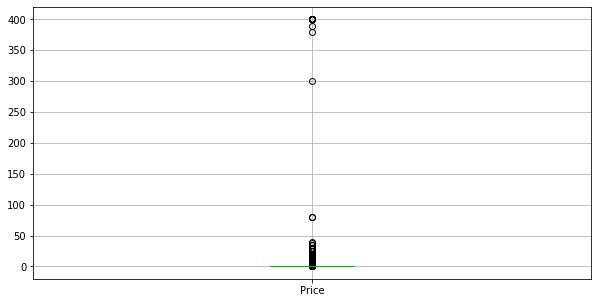

In [32]:
# checking for outliers in price column 
play_copy.boxplot(column= 'Price', figsize=(10,5))
# As we can clearly see there are outliers in the price column  

In [33]:
print('Yes there can be apps on the play store = $200, more than that')
play_copy[play_copy['Price']>200]

Yes there can be apps on the play store = $200, more than that


,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
4197,most expensive app (H),FAMILY,4.3,6,1500.0,100,Paid,399.99,Everyone,Entertainment,"July 16, 2018",1.00,7.0 and up
4362,💎 I'm rich,LIFESTYLE,3.8,718,26000.0,10000,Paid,399.99,Everyone,Lifestyle,"March 11, 2018",NaN,4.4 and up
4367,I'm Rich - Trump Edition,LIFESTYLE,3.6,275,7300.0,10000,Paid,400.00,Everyone,Lifestyle,"May 3, 2018",NaN,4.1 and up
5351,I am rich,LIFESTYLE,3.8,3547,1800.0,100000,Paid,399.99,Everyone,Lifestyle,"January 12, 2018",2.00,4.0.3 and up
5354,I am Rich Plus,FAMILY,4.0,856,8700.0,10000,Paid,399.99,Everyone,Entertainment,"May 19, 2018",3.00,4.4 and up
5355,I am rich VIP,LIFESTYLE,3.8,411,2600.0,10000,Paid,299.99,Everyone,Lifestyle,"July 21, 2018",NaN,4.3 and up
5356,I Am Rich Premium,FINANCE,4.1,1867,4700.0,50000,Paid,399.99,Everyone,Finance,"November 12, 2017",1.60,4.0 and up
5357,I am extremely Rich,LIFESTYLE,2.9,41,2900.0,1000,Paid,379.99,Everyone,Lifestyle,"July 1, 2018",1.00,4.0 and up
5358,I am Rich!,FINANCE,3.8,93,22000.0,1000,Paid,399.99,Everyone,Finance,"December 11, 2017",1.00,4.1 and up
5359,I am rich(premium),FINANCE,3.5,472,965.0,5000,Paid,399.99,Everyone,Finance,"May 1, 2017",3.40,4.4 and up


In [34]:
# Limit data to records with price < 30 dollar 
play_copy.drop(play_copy[play_copy['Price']>30].index,inplace = True)

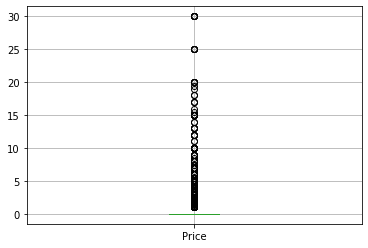

In [35]:
play_copy.boxplot(column = 'Price')
# as we can see we do not have any record with more than price $30 

In [36]:
play_copy[play_copy['Reviews']>1000000]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
139,Wattpad 📖 Free Books,BOOKS_AND_REFERENCE,4.6,2914724,21516.529524,100000000,Free,0.0,Teen,Books & Reference,"August 1, 2018",NaN,Varies with device
152,Google Play Books,BOOKS_AND_REFERENCE,3.9,1433233,21516.529524,1000000000,Free,0.0,Teen,Books & Reference,"August 3, 2018",NaN,Varies with device
189,Uber Driver,BUSINESS,4.4,1254730,21516.529524,10000000,Free,0.0,Everyone,Business,"August 3, 2018",NaN,Varies with device
194,OfficeSuite : Free Office + PDF Editor,BUSINESS,4.3,1002861,35000.000000,100000000,Free,0.0,Everyone,Business,"August 2, 2018",NaN,4.1 and up
201,Facebook Pages Manager,BUSINESS,4.0,1279184,21516.529524,50000000,Free,0.0,Everyone,Business,"August 2, 2018",NaN,Varies with device
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10190,Fallout Shelter,FAMILY,4.6,2721923,25000.000000,10000000,Free,0.0,Teen,Simulation,"June 11, 2018",NaN,4.1 and up
10200,Facebook Pages Manager,BUSINESS,4.0,1279800,21516.529524,50000000,Free,0.0,Everyone,Business,"August 6, 2018",NaN,Varies with device
10327,Garena Free Fire,GAME,4.5,5534114,53000.000000,100000000,Free,0.0,Teen,Action,"August 3, 2018",NaN,4.0.3 and up
10636,FRONTLINE COMMANDO,GAME,4.4,1351833,12000.000000,10000000,Free,0.0,Teen,Action,"October 28, 2013",NaN,2.1 and up


In [37]:
# limit the reviews greater than 1 million 
play_copy.drop(play_copy[play_copy['Reviews']>1000000].index,inplace = True)

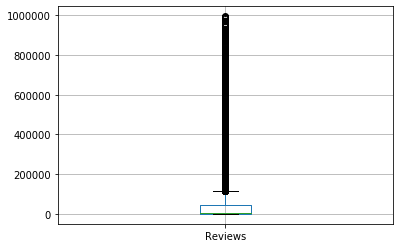

In [38]:
play_copy.boxplot(column = 'Reviews')
# As we can see there are no reviews more than 1 million 

In [39]:
#What is the 95th percentile of the installs
play_copy.Installs.quantile(0.95)

10000000.0

In [40]:
#removing those records 
play_copy.drop(play_copy[play_copy['Installs']>play_copy.Installs.quantile(0.95)].index,inplace = True)

In [41]:
print( play_copy.drop(play_copy[play_copy['Installs']>play_copy.Installs.quantile(0.95)].index,inplace = True))

None


## 5. What is the distribution of ratings like? (use Seaborn) More skewed towards higher/lower values?
### a. How do you explain this? 
### b. What is the implication of this on your analysis? 

The skewness of this distribution is -1.7434270330647985


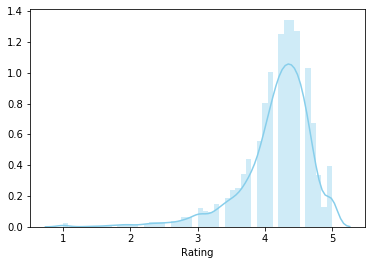

In [42]:
sns.distplot( play_copy['Rating'] , color="skyblue")
print('The skewness of this distribution is',play_copy['Rating'].skew())

In [43]:
# What is the implication of this on your analysis
print('Mean of the above distribution ' ,play_copy['Rating'].mean())
print('Median of above distribution is',play_copy['Rating'].median())
print("IN THE ABOVE DISTRIBUTION, MEAN<MEDIAN WE CAN SAY THAT RATINGS IS NEGETIVELY SKEWED ")

Mean of the above distribution  4.170800237107292
Median of above distribution is 4.3
IN THE ABOVE DISTRIBUTION, MEAN<MEDIAN WE CAN SAY THAT RATINGS IS NEGETIVELY SKEWED 


## 6. What are the top Content Rating values?
### a. Are there any values with very few records? 
### b. If yes, drop those as they won’t help in the analysis 

In [44]:
play_copy['Content Rating'].value_counts()

Everyone           6782
Teen                900
Mature 17+          417
Everyone 10+        332
Adults only 18+       3
Unrated               1
Name: Content Rating, dtype: int64

In [45]:
# droping records (Adults only 18+ and unrated)
play_copy.drop(play_copy[play_copy['Content Rating']=='Adults only 18+'].index,inplace = True)
play_copy.drop(play_copy[play_copy['Content Rating']=='Unrated'].index,inplace = True)
print(play_copy['Content Rating'].value_counts())

Everyone        6782
Teen             900
Mature 17+       417
Everyone 10+     332
Name: Content Rating, dtype: int64


## 7. Effect of size on rating
### a. Make a joinplot to understand the effect of size on rating 
### b. Do you see any patterns? 
### c. How do you explain the pattern?

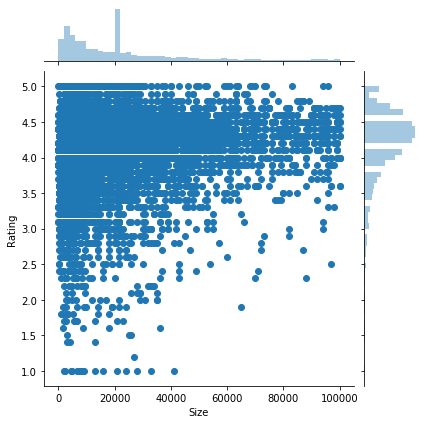

In [46]:
sns.jointplot(data = play_copy,x = 'Size',y = 'Rating',kind = "scatter")

In [47]:
print("yes we can se pattern bw size and rating, there is a correlation between them")
print("___________________________________________________________________________________________")
#How do you explain the pattern?
print("when the size of the application increases the rating of the application also increases, thus we can say there is a positive correlation beetween them")


yes we can se pattern bw size and rating, there is a correlation between them
___________________________________________________________________________________________
when the size of the application increases the rating of the application also increases, thus we can say there is a positive correlation beetween them


## 8. Effect of price on rating 
### a. Make a jointplot (with regression line) 
### b. What pattern do you see? 
### c. How do you explain the pattern? 
### d. Replot the data, this time with only records with price > 0
### e. Does the pattern change? 
### f. What is your overall inference on the effect of price on the rating

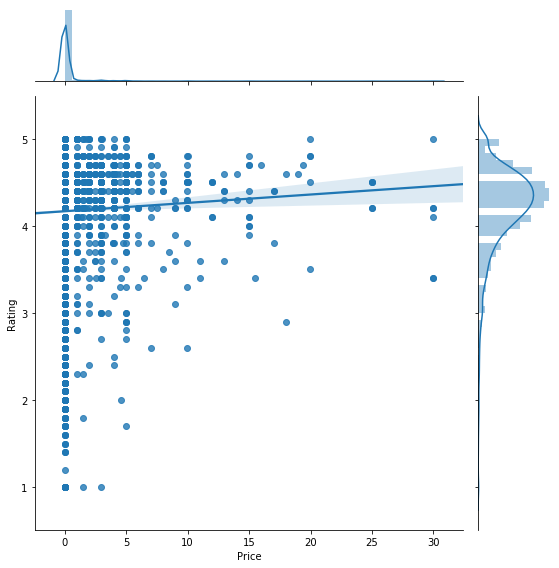

In [48]:
prj = sns.jointplot("Price", "Rating", data=play_copy, kind="reg",height = 8)


In [49]:
print("we can see as price increaase there is no change in the rating it reamins constant between 4 and 4.5 ")
print("______________________________________________________________________________________________________________")
print("we can also conclude there is no strong correlation bw both of them")

we can see as price increaase there is no change in the rating it reamins constant between 4 and 4.5 
______________________________________________________________________________________________________________
we can also conclude there is no strong correlation bw both of them


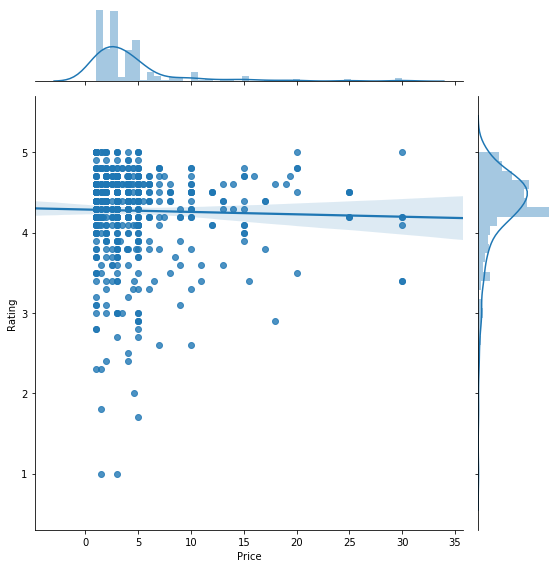

In [50]:
#Replot the data, this time with only records with price > 0
play_copy2 = play_copy.loc[play_copy.Price>0]
prj2 =  sns.jointplot("Price", "Rating", data=play_copy2, kind="reg",height = 8)

we can see a minimal change in the pattern


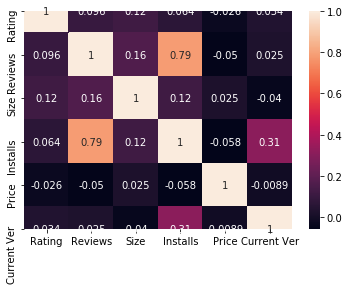

In [51]:
print("we can see a minimal change in the pattern")
sns.heatmap(play_copy2.corr(),annot=True)


In [52]:
print("there is a slight negative correlation bw the price and rating")

there is a slight negative correlation bw the price and rating


In [53]:
# What is your overall inference on the effect of price on the rating
print("As such there is no major effect of price on rating, if price is increasing the rating still remain constant bw 4 and 4.5")

As such there is no major effect of price on rating, if price is increasing the rating still remain constant bw 4 and 4.5


## 9. Look at all the numeric interactions together – 
### a. Make a pairplort with the colulmns - 'Reviews', 'Size', 'Rating', 'Price' 

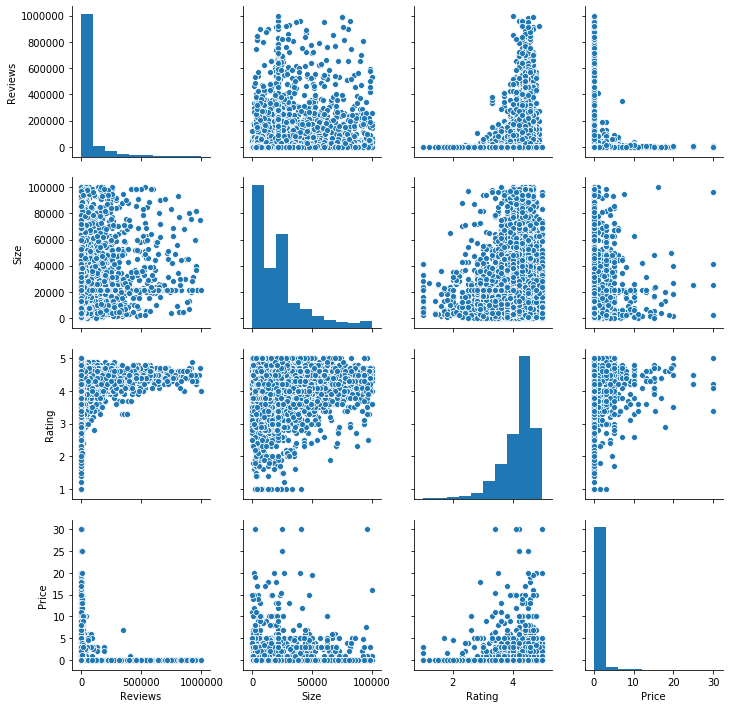

In [54]:
sns.pairplot(play_copy,vars = ['Reviews','Size','Rating','Price'], kind = 'scatter')

## 10.Rating vs. content rating 
### a. Make a bar plot displaying the rating for each content rating 
### b. Which metric would you use? Mean? Median? Some other quantile? 
### c. Choose the right metric and plot 

In [55]:
group1 = play_copy.groupby('Content Rating')[['Rating']].count().reset_index()
group1

,Content Rating,Rating
0,Everyone,6782
1,Everyone 10+,332
2,Mature 17+,417
3,Teen,900


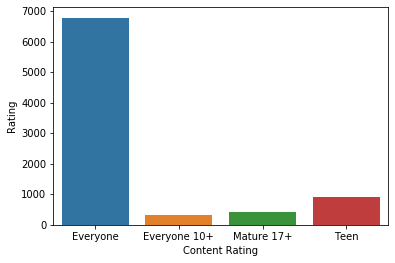

In [56]:
sns.barplot(data = group1,x= 'Content Rating',y = 'Rating')

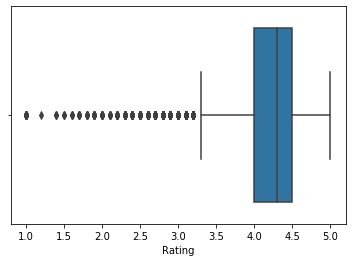

In [57]:
sns.boxplot(data = play_copy,x = 'Rating')

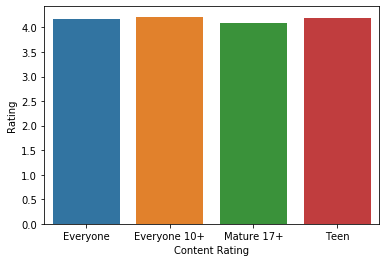

In [58]:
#we use mean and median both 
group2 = play_copy.groupby('Content Rating')[['Rating']].mean().reset_index()
sns.barplot(data = group2,x= 'Content Rating',y = 'Rating')

## 11. Content rating vs. size vs. rating – 3 variables at a time 
### a. Create 5 buckets (20% records in each) based on Size 
### b. By Content Rating vs. Size buckets, get the rating (20th percentile) for each combination 
### c. Make a heatmap of this i. Annotated ii. Greens color map 
### d. What’s your inference? Are lighter apps preferred in all categories? Heavier? Some?

In [59]:
play_copy['Size'].max()

100000.0

In [60]:
# to make bins 
bins1 = [0,20000,40000,60000,80000,100000]
names1 = ['0-20k','20k-40k','40k-60k','60k-80k','80k-100k']

In [61]:
play_copy['Bucket'] = pd.cut(play_copy['Size'],bins1, labels = names1)

In [62]:
group3=pd.pivot_table(play_copy, values='Rating', index='Bucket', columns='Content Rating')
                      
group3


Content Rating,Everyone,Everyone 10+,Mature 17+,Teen
Bucket,,,,
0-20k,4.145730,4.247561,4.010582,4.182240
20k-40k,4.200195,4.169811,4.156291,4.170432
40k-60k,4.167083,4.263636,4.190476,4.237383
60k-80k,4.245408,4.280769,4.200000,4.274194
80k-100k,4.260127,4.304762,4.252632,4.270313


In [63]:
group3=pd.pivot_table(play_copy, values='Rating', index='Bucket', columns='Content Rating',aggfunc=lambda x:np.quantile(x,0.2))
                      
group3

Content Rating,Everyone,Everyone 10+,Mature 17+,Teen
Bucket,,,,
0-20k,3.80,4.02,3.5,3.9
20k-40k,4.00,4.00,4.0,3.9
40k-60k,3.90,4.06,4.1,4.0
60k-80k,4.00,4.00,4.0,4.0
80k-100k,4.04,4.10,4.0,4.0


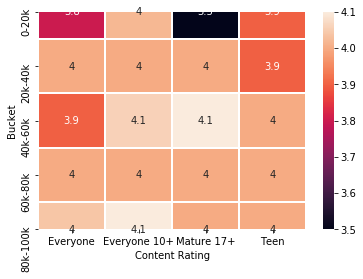

In [64]:
sns.heatmap(group3,annot=True,linewidths=1)

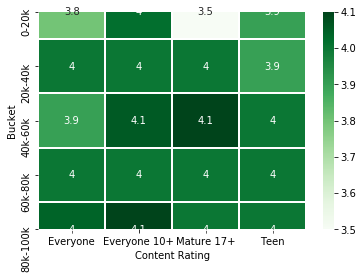

In [65]:
#green color heatmap 
sns.heatmap(group3,annot=True,linewidths=1,cmap = 'Greens')

In [66]:
print('No lighter apps are not preffered , because apps with greater size are having greter ratings in all category') 

No lighter apps are not preffered , because apps with greater size are having greter ratings in all category
